# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [1]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

In [2]:
# Import du dataframe "data.csv"
df = pd.read_csv("data.csv", decimal=",")

# l'argument decimal="," remplace le point par la virgule

In [3]:
# voir les 10 premieres lignes du dataframe
df.head(10)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse


In [4]:
# description des données
df.describe() 

,Experience
count,9488.000000
mean,2.814186
std,2.716293
min,0.000000
25%,1.000000
50%,2.000000
75%,3.500000
max,21.000000


In [5]:
# informations sur les données 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
Entreprise      9565 non-null object
Metier          9563 non-null object
Technologies    9582 non-null object
Diplome         9582 non-null object
Experience      9488 non-null float64
Ville           9582 non-null object
dtypes: float64(1), object(5)
memory usage: 449.3+ KB
None


### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

In [6]:
# Le nombre d'observations et colonnes dans le dataset
print(f'Ce dataframe contient {df.shape[0]} observations')

Ce dataframe contient 9582 observations


In [7]:
# Le nombre de valeurs manquantes par colonnes
print(df.isnull().sum())

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64


In [8]:
# nombre total de valeurs manquantes 
print(f'Ce dataframe contient au total {df.isnull().sum().sum()} valeurs manquantes')

Ce dataframe contient au total 130 valeurs manquantes


### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

#### a) Nombre de valeurs manquence pour les data scientists et engineers

In [9]:
Nbre_na_ds = df["Experience"][df["Metier"] == 'Data scientist'].isna().sum()
print(f'Nombre de valeurs manquantes pour les data scientists {Nbre_na_ds}')

Nombre de valeurs manquantes pour les data scientists 32


In [10]:
Nbre_na_de = df["Experience"][df["Metier"] == 'Data engineer'].isna().sum()
print(f'Nombre de valeurs manquantes pour les data engineers {Nbre_na_de}')

Nombre de valeurs manquantes pour les data engineers 20


#### b) Calcul de la mediane des années d'experience des data scientists et la moyenne d'experience des data engineers

In [11]:
Exp_ds = df['Experience'][df['Metier'] == 'Data scientist']
Med_exp_ds = Exp_ds.median(axis=0, skipna=True)
print(f"Les data scientists ont en mediane {Med_exp_ds} années d'experience")

Les data scientists ont en mediane 2.0 années d'experience


In [12]:
Exp_de = df['Experience'][df['Metier'] == 'Data engineer']
Mean_exp_de = round(Exp_de.mean(axis=0, skipna=True), 2)
print(f"Les data engineers ont en moyenne {Mean_exp_de} années d'experience")

Les data engineers ont en moyenne 2.98 années d'experience


#### c) Imputation des valeurs manquantes pour la variable "Experience"

In [13]:
# Avec la valeur médiane pour les data scientists
Index_missing_values_ds = list(df[df['Metier'] == 'Data scientist'].loc[df['Experience'].isnull(),'Experience'].index)
df.iloc[Index_missing_values_ds , 4] = Med_exp_ds

In [14]:
# Avec la valeur moyenne des data engineer
Index_missing_values_de = list(df[df['Metier'] == 'Data engineer'].loc[df['Experience'].isnull(),'Experience'].index)
df.iloc[Index_missing_values_de, 4] =  Nbre_na_de

In [15]:
# description des données
df.describe()

,Experience
count,9540.000000
mean,2.847484
std,2.821062
min,0.000000
25%,1.000000
50%,2.000000
75%,3.500000
max,21.000000


### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

#### a) Nombres d'observation par profil

In [16]:
# Nombres d'osservations par metiers
df.groupby(by='Metier').size()

Metier
Data architecte        2123
Data engineer          2347
Data scientist         3865
Lead data scientist    1228
dtype: int64

#### b) Calcul de la moyenne d'experience pour chaque profil

In [17]:
print(round(df.groupby('Metier').mean(),2))

                     Experience
Metier                         
Data architecte            3.00
Data engineer              3.13
Data scientist             2.24
Lead data scientist        3.97


### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

Text(0.5,1,"Représentation du nombre d'année d'expérience par métier")

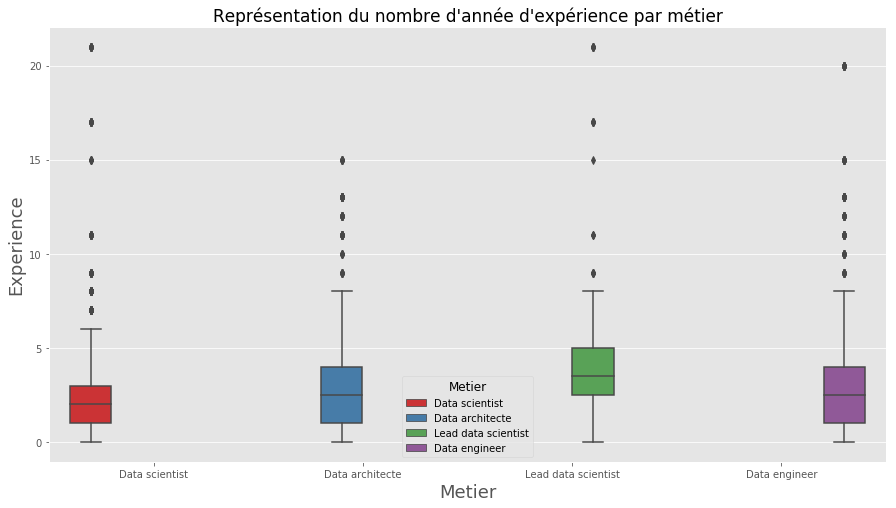

In [18]:
plt.figure(figsize=(15, 8))
b =  sb.boxplot(x="Metier", y="Experience",
            hue="Metier", data=df, palette="Set1")

b.axes.set_xlabel("Metier",fontsize=18)
b.axes.set_ylabel("Experience",fontsize=18)
b.axes.set_title("Représentation du nombre d'année d'expérience par métier",fontsize=17)

In [19]:
print(round(df.groupby('Metier').var(),2))

                     Experience
Metier                         
Data architecte            7.42
Data engineer             10.10
Data scientist             6.33
Lead data scientist        7.26


In [20]:
print(round(df.groupby('Metier').median(),2))

                     Experience
Metier                         
Data architecte             2.5
Data engineer               2.5
Data scientist              2.0
Lead data scientist         3.5


### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

#### a) Nombre d'années d'experiences manquantes pour les autres profils

In [21]:
Nbre_na_da = df["Experience"][df["Metier"] == 'Data architecte'].isna().sum()
print(f'Nombre de valeurs manquantes pour les Data architectes {Nbre_na_da}')

Nombre de valeurs manquantes pour les Data architectes 23


In [22]:
Nbre_na_lds = df["Experience"][df["Metier"] == 'Lead data scientist'].isna().sum()
print(f'Nombre de valeurs manquantes pour les Lead data scientists {Nbre_na_lds}')

Nombre de valeurs manquantes pour les Lead data scientists 19


In [23]:
Nbre_na_lds = df["Experience"][df["Metier"] == 'Lead data scientist'].isna().sum()
print(f'Nombre de valeurs manquantes pour les Lead data scientists {Nbre_na_lds}')

Nombre de valeurs manquantes pour les Lead data scientists 19


In [24]:
# Verifier les NA pour les autres variables
df['Experience'].isna().sum()

42

#### b) Calcul des moyennes d'experience pour les profils:
- Data architecte 
- Lead data scientist


In [25]:
Exp_da = df['Experience'][df['Metier'] == 'Data architecte']
Mean_exp_da = Exp_da.mean(axis=0, skipna=True)

In [26]:
Exp_lds = df['Experience'][df['Metier'] == 'Lead data scientist']
Mean_exp_lds = Exp_lds.mean(axis=0, skipna=True)

#### c) Imputation des valeurs manquants par la moyenne de chaque profil

In [27]:
Index_missing_values_da = list(df[df['Metier'] == 'Data architecte'].loc[df['Experience'].isnull(),'Experience'].index)
df.iloc[Index_missing_values_da, 4] =  Mean_exp_da

In [28]:
Index_missing_values_lds  = list(df[df['Metier'] == 'Lead data scientist'].loc[df['Experience'].isnull(),'Experience'].index)
df.iloc[Index_missing_values_lds, 4] =  Mean_exp_lds

#### d) valeurs manquantes pour la variables "Metier"

In [78]:
val_man = df['Metier'].isna().sum()

In [30]:
df['Exp_label'] = np.nan

In [31]:
Metier_l = list(set(df['Metier']))
quantile_label = {0.25:'debutant', 0.5:'confirme', 0.75:'avance', 0.76:'expert'}
for i in Metier_l:
    for ql in quantile_label:
        if ql <= 0.75:
            ind = list(df[(df['Metier'] == i) & (df['Exp_label'].isna())].loc[df['Experience'] < df['Experience'].quantile(q=ql),'Experience'].index)
            df.iloc[ind , 6] = quantile_label[ql]
        else: # Expert class
            ind = list(df[(df['Metier'] == i) & (df['Exp_label'].isna())].index)
            df.iloc[ind , 6] = quantile_label[ql]


#### e) Representation graphique

Text(0.5,1,"Répartion des niveaux d'expériece par métier")

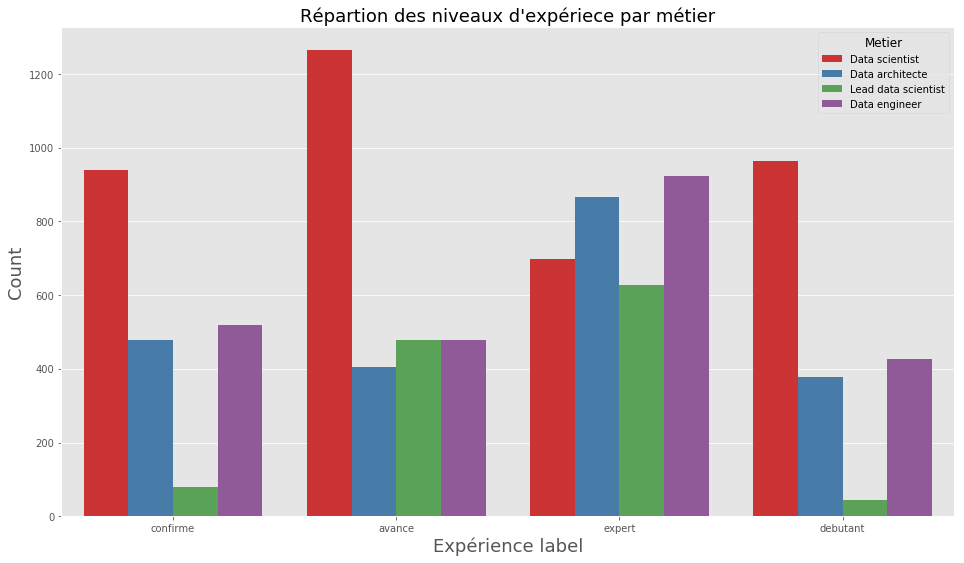

In [32]:
plt.figure(figsize=(16, 9))
b =  sb.countplot( x="Exp_label", hue="Metier", data=df, palette="Set1")

b.axes.set_xlabel("Expérience label",fontsize=18)
b.axes.set_ylabel("Count",fontsize=18)
b.axes.set_title("Répartion des niveaux d'expériece par métier",fontsize=18)

### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

In [48]:
l =[]
techno = df['Technologies']
for i in range(len(techno)):
    v = re.split('/', techno[i], flags=re.IGNORECASE)
    for i in range(len(v)):
        l.append(v[i])

# transformation des données
data_technologie = pd.Series(l).value_counts()
data_techno = data_technologie.to_frame().reset_index()
data_techno.columns = ['technologie', 'frequence']

data_techno.head()


,technologie,frequence
0,Python,6627
1,R,4374
2,SQL,2581
3,Java,1719
4,Hadoop,1589


In [49]:
# extraction des 5 technologie les plus utilisées
top5 = data_techno.iloc[0:5]
print(top5)

  technologie  frequence
0      Python       6627
1           R       4374
2         SQL       2581
3        Java       1719
4      Hadoop       1589


Text(0.5,1,'Top 5 des tecnhologies')

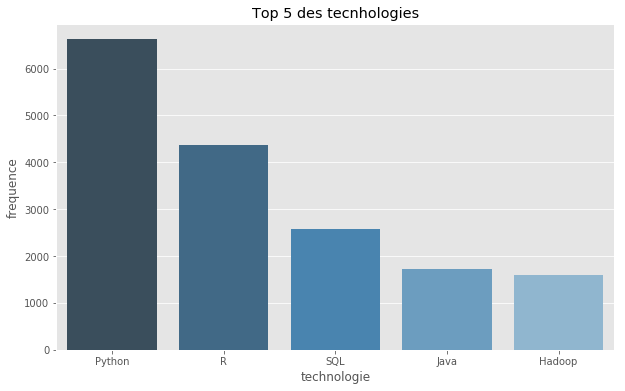

In [50]:
plt.figure(figsize=(10,6))
sb.barplot('technologie', 'frequence', data=top5, palette="Blues_d").set_title("Top 5 des tecnhologies")

### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

#### a) Encodage des variables


In [51]:
# entreprise 
s = pd.Series(list(df['Entreprise']))
one_hot_encoding_entreprise = pd.get_dummies(s)
one_hot_encoding_entreprise.shape
indexL = []
one_hot_encoding_entreprise.sum(axis=1)
for i in range(one_hot_encoding_entreprise.shape[1]):
    if one_hot_encoding_entreprise.iloc[:,i].sum() < 30:
        indexL.append(i)
one_hot_encoding_entreprise = one_hot_encoding_entreprise.drop(one_hot_encoding_entreprise.columns[indexL], axis=1)

In [52]:
print(one_hot_encoding_entreprise.shape)

(9582, 49)


In [53]:
# technologie

Ltechno = []
techno = df['Technologies']
for i in range(len(techno)):
    v = re.split('/', techno[i], flags=re.IGNORECASE)
    for i in range(len(v)):
        Ltechno.append(v[i])
set_Techno = list(set(Ltechno))
set_Techno = set_Techno[1:len(set_Techno)] # Remove the empty techno

MTechno = np.zeros((df.shape[0], len(set_Techno)))
dfTechno = pd.DataFrame(MTechno)


In [54]:
for i in range(len(set_Techno)):
    for j in range(df.shape[0]):
        if df['Technologies'][j].find(set_Techno[i]) != -1:
            dfTechno.iloc[j,i] = 1

In [55]:
dfTechno.shape

(9582, 60)

In [56]:
# Diplome 
s_techno = pd.Series(list(df['Technologies']))
one_hot_encoding_techno = pd.get_dummies(s_techno)

In [57]:
print(one_hot_encoding_techno.shape)

(9582, 57)


In [58]:
# metier 
s_metier = pd.Series(list(df['Metier']))
one_hot_encoding_metier = pd.get_dummies(s_metier)

In [59]:
print(one_hot_encoding_metier.shape)

(9582, 4)


In [60]:
# Diplome 
s_diplome = pd.Series(list(df['Diplome']))
one_hot_encoding_diplome = pd.get_dummies(s_diplome)

In [61]:
print(one_hot_encoding_experience.sum(axis=0))
print(one_hot_encoding_diplome.shape)


NameError: name 'one_hot_encoding_experience' is not defined

In [65]:
# Exp_label 
s_experience = pd.Series(list(df['Exp_label']))
one_hot_encoding_experience = pd.get_dummies(s_experience)

In [66]:
print(one_hot_encoding_experience.shape)
print(one_hot_encoding_experience.sum(axis=0))

(9582, 4)
avance      2625
confirme    2015
debutant    1811
expert      3112
dtype: int64


In [67]:
# Ville
s_ville = pd.Series(list(df['Ville']))
one_hot_encoding_ville = pd.get_dummies(s_ville)

In [68]:
print(one_hot_encoding_ville.sum(axis=0))
print(one_hot_encoding_ville.shape)

Bordeaux        692
Grenoble         99
Lille           771
Lyon           1781
Marseille      1548
Montpellier      87
Nantes          365
Nice            183
Paris          2015
Rennes          360
Rouen           315
Strasbourg      309
Toulon          186
Toulouse        871
dtype: int64
(9582, 14)


#### b) Merge des data frames

In [98]:
# merge all data transform
df_merge = pd.concat([one_hot_encoding_diplome, 
                      one_hot_encoding_entreprise, 
                      one_hot_encoding_techno,
                      one_hot_encoding_metier,
                      one_hot_encoding_ville , 
                      one_hot_encoding_experience], axis=1)


In [99]:
print(f'le nouveau daframe contient {df_merge.shape[0]} observation et {df_merge.shape[1]} variables')
print(f'Le daframe initial contient {df.shape[0]} observation et {df.shape[1]-1} variables')

le nouveau daframe contient 9582 observation et 132 variables
Le daframe initial contient 9582 observation et 6 variables


In [100]:
df_merge.head()

,Bachelor,Master,No diploma,Phd,Accenture,"Advanced Micro Devices, Inc.",Allstate,Amazon.com,Ball Aerospace,Bank of America,...,Paris,Rennes,Rouen,Strasbourg,Toulon,Toulouse,avance,confirme,debutant,expert
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### C) Selection des variables

In [101]:
# sampling data in train and test
X = df_merge.iloc[ :, :df_merge.shape[1]-1]
y = df_merge.iloc[:,-1]


In [102]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

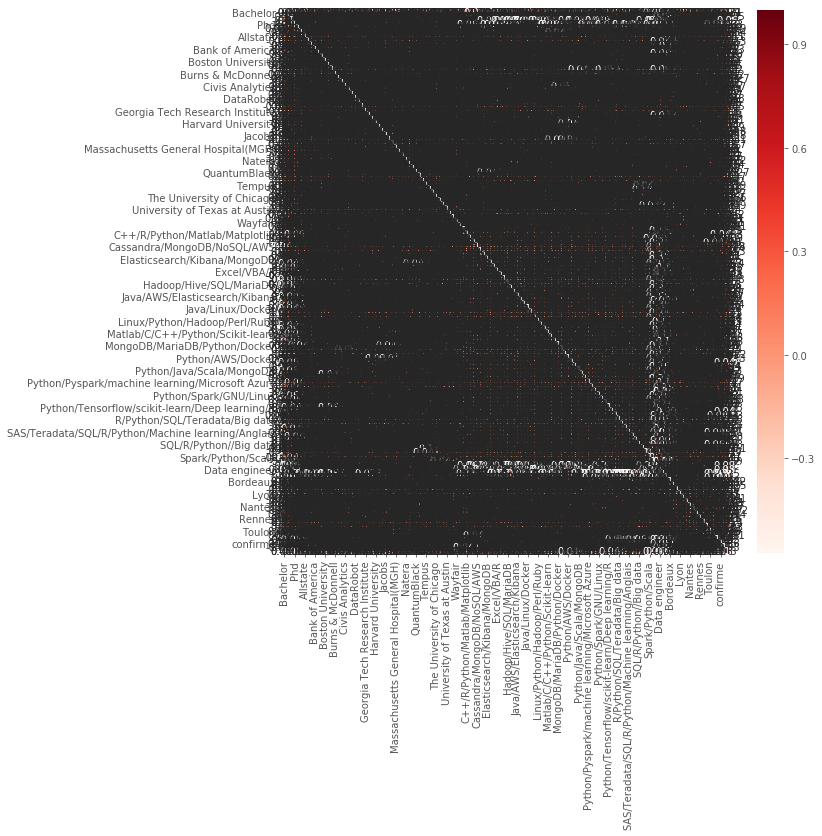

In [103]:
#Using Pearson Correlation
plt.figure(figsize=(10,10))
cor = df_merge.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [104]:
# Correlation with expert variable 
cor_target = abs(cor["expert"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

No diploma             0.060013
Phd                    0.062668
Data architecte        0.094178
Data engineer          0.082785
Data scientist         0.253606
Lead data scientist    0.152794
avance                 0.426011
confirme               0.357885
debutant               0.334802
expert                 1.000000
Name: expert, dtype: float64

In [81]:
# Correlation with confirme variable 
cor_target = abs(cor["confirme"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

Data scientist         0.066418
Lead data scientist    0.137321
avance                 0.316978
confirme               1.000000
debutant               0.249113
expert                 0.357885
Name: confirme, dtype: float64

In [106]:
# matrice de correlation
print( pd.DataFrame(cor))

            Bachelor    Master  No diploma       Phd  Accenture  \
Bachelor    1.000000 -0.428057   -0.137645 -0.228910   0.000113   
Master     -0.428057  1.000000   -0.346663 -0.576517   0.015084   
No diploma -0.137645 -0.346663    1.000000 -0.185383  -0.004006   
Phd        -0.228910 -0.576517   -0.185383  1.000000  -0.015016   
Accenture   0.000113  0.015084   -0.004006 -0.015016   1.000000   
...              ...       ...         ...       ...        ...   
Toulouse    0.005633 -0.012252   -0.001637  0.010905  -0.001868   
avance     -0.019484 -0.007873   -0.045390  0.057573  -0.000496   
confirme    0.001654 -0.001718   -0.005191  0.004323  -0.000341   
debutant   -0.003093  0.007725   -0.016531  0.005174   0.003504   
expert      0.020815  0.002471    0.060013 -0.062668  -0.001860   

            Advanced Micro Devices, Inc.  Allstate  Amazon.com  \
Bachelor                       -0.003330 -0.010794   -0.003754   
Master                          0.008685 -0.005723    0.011167 

In [127]:
# Create a PCA instance: pca
pca = PCA(n_components= 20)
principalComponents = pca.fit_transform(df_merge)



([<matplotlib.axis.XTick at 0x1a19037ad0>,
 <a list of 20 Text xticklabel objects>)

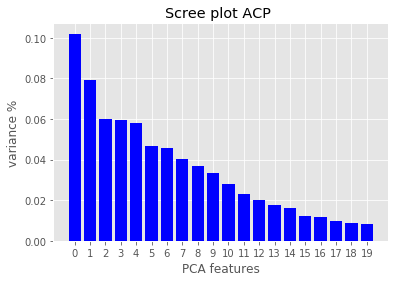

In [132]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
 

In [135]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)


In [141]:
# dimension
PCA_components.shape

(9582, 20)

In [136]:
#imprime les 10 premiers composantes
print(PCA_components.iloc[: 9])

          0         1         2         3         4         5         6  \
0  0.453701 -0.736168 -0.453739  0.527741  0.047889  0.273682 -0.949707   
1 -0.334173 -0.515721  0.464757 -0.466910  0.917408 -0.151220  0.052254   
2 -0.117481 -0.656681  0.624805 -0.811299  0.133285 -0.087178 -0.105403   
3  0.396073 -0.739955 -0.364193  0.571264  0.068838 -0.597761 -0.481562   
4  1.207255  0.324984  0.393263 -0.456924 -0.076802 -0.125247  0.001337   
5 -0.735653 -0.237873 -0.466053 -0.672469 -0.391476 -0.184384 -0.113325   
6  0.689775  0.240452 -0.270274  0.428421  0.103759  0.420526  0.721167   
7  0.202247  0.588973 -0.595171 -0.245601 -0.282029 -0.080311  0.056327   
8 -0.661428  0.908878 -0.474625 -0.287972  0.599932  0.721924 -0.352024   

          7         8         9        10        11        12        13  \
0 -0.303063  0.088548 -0.043013 -0.197152  0.082780  0.022989 -0.004917   
1  0.850007 -0.232214 -0.223960 -0.407215 -0.223200  0.046537 -0.023752   
2  0.027983 -0.031775  0

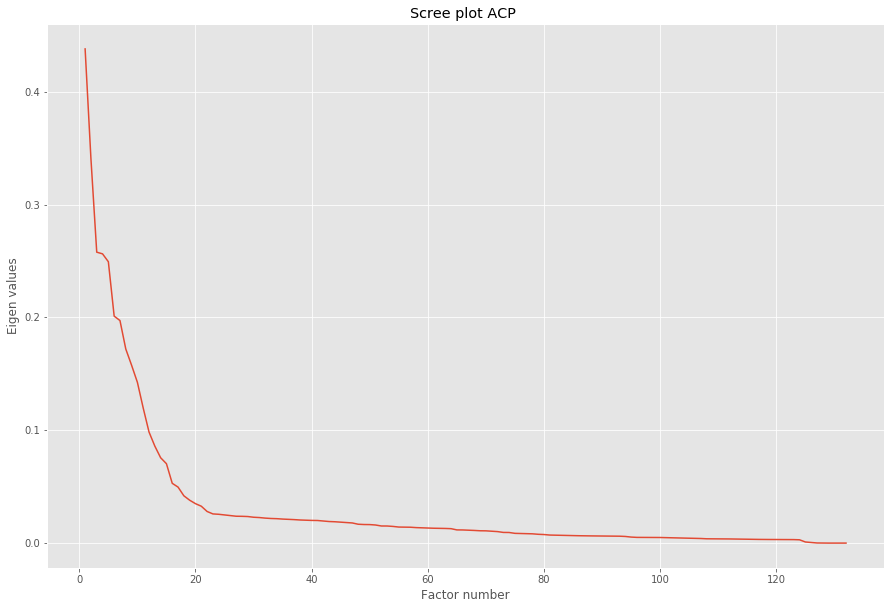

In [157]:

p = df_merge.shape[1] 

#scree plot
fig = plt.figure(1, figsize=(15, 10))
plt.plot(np.arange(1,p+1),eigval) 
plt.title("Scree plot ACP ") 
plt.ylabel("Eigen values") 
plt.xlabel("Factor number") 
plt.show()


In [159]:
#eigen values
eig_val = acp.singular_values_**2/n

# je prend les 10 premier axes principal
print(PCA_components.iloc[:,:10])
print(eig_val[:10])

             0         1         2         3         4         5         6  \
0     0.453701 -0.736168 -0.453739  0.527741  0.047889  0.273682 -0.949707   
1    -0.334173 -0.515721  0.464757 -0.466910  0.917408 -0.151220  0.052254   
2    -0.117481 -0.656681  0.624805 -0.811299  0.133285 -0.087178 -0.105403   
3     0.396073 -0.739955 -0.364193  0.571264  0.068838 -0.597761 -0.481562   
4     1.207255  0.324984  0.393263 -0.456924 -0.076802 -0.125247  0.001337   
...        ...       ...       ...       ...       ...       ...       ...   
9577  0.435214 -0.757835 -0.396488  0.524073  0.087121 -0.809385 -0.121457   
9578 -0.031759 -0.416735 -0.808462 -0.345001 -0.487875 -0.163713 -0.026080   
9579  0.436201 -0.728768 -0.437421  0.486344  0.053923  0.264140 -0.963577   
9580 -0.037281 -0.427301 -0.824611 -0.344722 -0.487319 -0.139044 -0.029441   
9581  1.108064  0.405367 -0.408633  0.319179 -0.203873  0.992919  0.167295   

             7         8         9  
0    -0.303063  0.088548 -

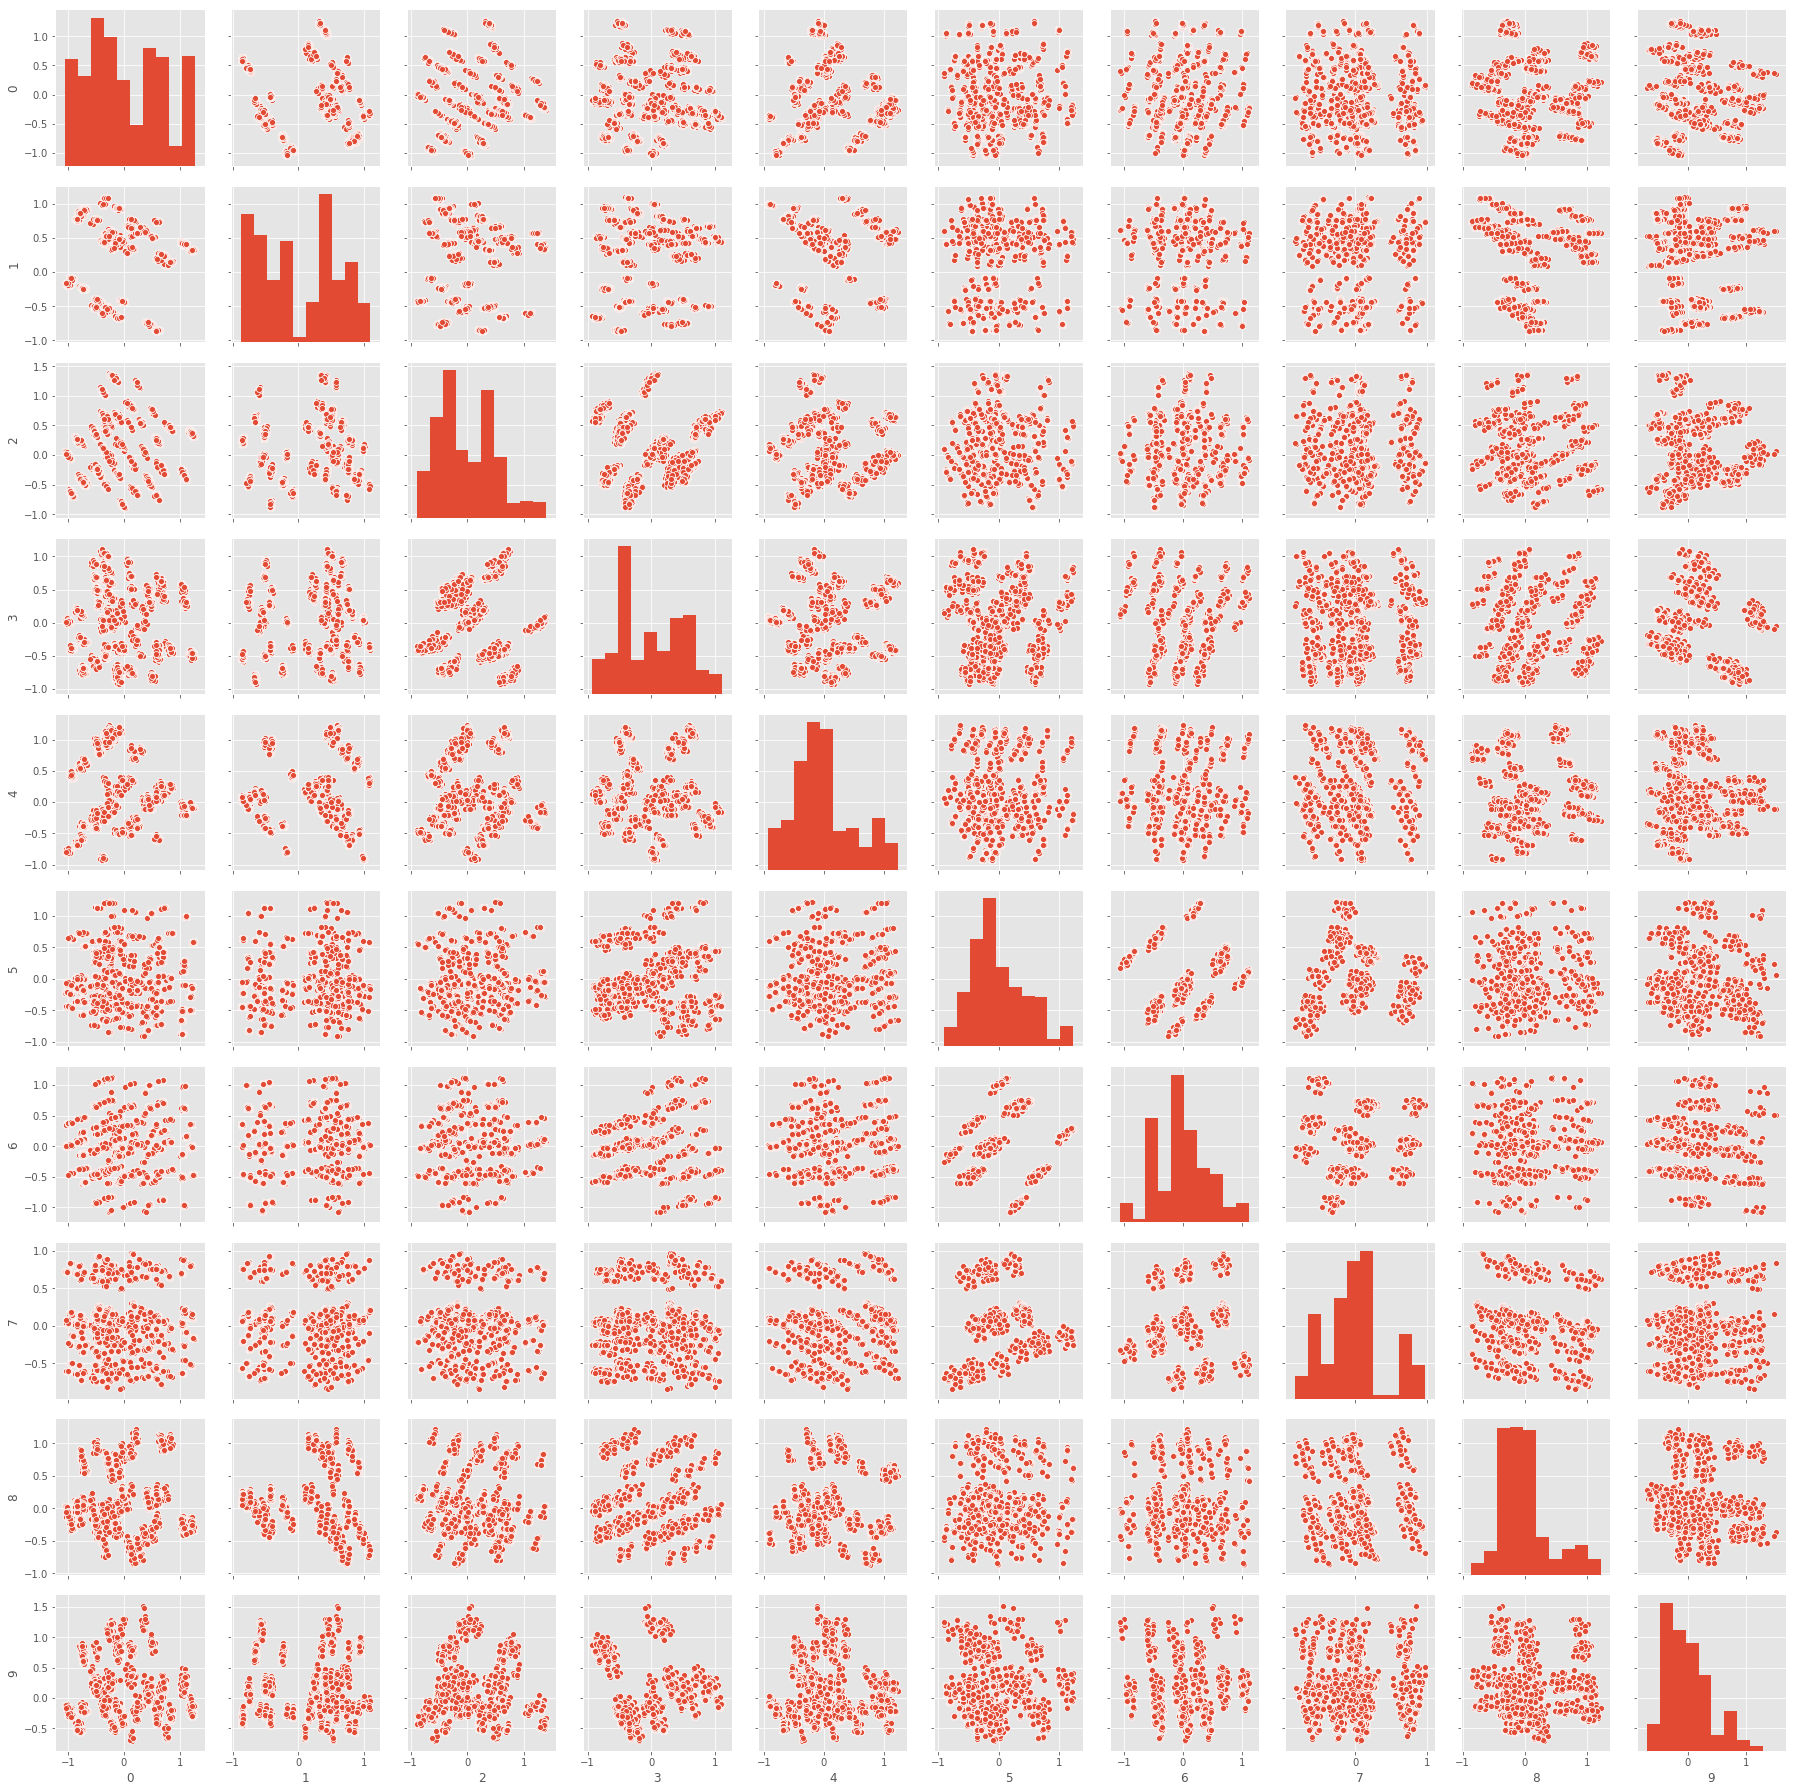

In [153]:
sb.pairplot(PCA_components.iloc[:,:10])

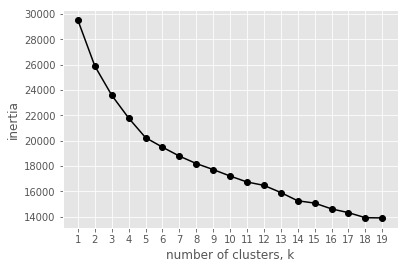

In [175]:

ks = range(1, 20)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:20])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [176]:
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
#afficher la matrice des corrélations variables x facteurs
print(corvar)


[[-1.11494812e-02  1.31273297e-01  3.39802093e-02 ...  8.44714402e-18
  -0.00000000e+00 -0.00000000e+00]
 [-1.68346365e-01 -4.55854289e-01 -7.57043170e-02 ...  8.44714402e-18
  -3.51837425e-33  1.86927980e-33]
 [-6.23057208e-02  9.74633475e-02  5.45583179e-02 ...  8.44714402e-18
   1.75741058e-32  6.88933407e-33]
 ...
 [ 4.36833959e-02 -2.75674140e-02 -1.90640174e-02 ...  9.67385693e-17
   1.43882655e-17  2.84666563e-18]
 [ 6.52803064e-02 -4.12421409e-02 -5.87784996e-02 ...  9.67385693e-17
   1.43882655e-17  2.84666563e-18]
 [-2.60105750e-01  1.56803326e-01 -2.32696999e-01 ...  9.67385693e-17
   1.43882655e-17  2.84666563e-18]]


IndexError: index 131 is out of bounds for axis 0 with size 131

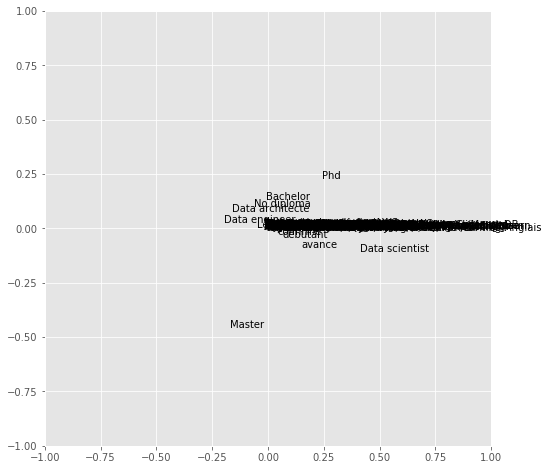

In [177]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8)) 
axes.set_xlim(-1,1) 
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p): 
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
#ajouter les axes
fig = plt.figure(1, figsize=(20, 15))

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

### 10) Décrire de façon détaillée les différentes étapes pour mener à bien un projet data complexe.

Dans le cadre d’une campagne de recrutement vous avez reçu un ensemble de cv qui ne sont pas à jour (le poste actuel n’est pas présent). Deux exemple de CV vous sont donnés en pièce jointe (il n'y a pas de mise en page type). Tous les CV sont au format PDF.

On souhaite connaitre le poste actuel de chaque candidat.

-  Quelles sont les différentes étapes nécessaires à la réalisation d'un tel projet?
-  Pour chaque étape, détaillez les taches à accomplir, les méthodes à suivre, les pistes possibles, les points critiques.
-  Justifiez consciencieusement vos choix


In [414]:
from pdftools.pdffile import PDFDocument
 
    
doc = PDFDocument('cv1.pdf')
 
doc.document_version()
 
pages = doc.count_pages()
print(pages)
 


ModuleNotFoundError: No module named 'pdftools'